## 📦 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cấu hình style cho biểu đồ
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

# Hiển thị tất cả các cột
pd.set_option('display.max_columns', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 📊 Load & Prepare Data

In [2]:
# Load dữ liệu từ file CSV
df = pd.read_csv("data/churn.csv")

print(f"📈 Dataset shape: {df.shape}")
print(f"\n📋 Columns: {df.columns.tolist()}")
print(f"\n🔍 First 5 rows:")
df.head()

📈 Dataset shape: (243787, 21)

📋 Columns: ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn']

🔍 First 5 rows:


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,63.531377,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,25.725595,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,57.364061,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,131.537507,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,45.356653,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [3]:
# Kiểm tra thông tin tổng quan và missing values
print("📊 Dataset Info:")
df.info()
print("\n❓ Missing Values:")
print(df.isnull().sum())

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                24

## 🔧 Feature Engineering

In [4]:
# 1. Flag khách hàng Mới (<= 3 tháng)
df['Is_New_Customer'] = df['AccountAge'] <= 3

# 2. Flag Phí cao (Top 25% toàn bộ dataset)
high_charge_threshold = df['MonthlyCharges'].quantile(0.75)
df['Is_High_Charge'] = df['MonthlyCharges'] > high_charge_threshold

# 3. Flag các phương thức thanh toán thủ công
df['Is_Electronic_Check'] = df['PaymentMethod'] == 'Electronic check'
df['Is_Mailed_Check'] = df['PaymentMethod'] == 'Mailed check'

# 4. Nhóm các phương thức thanh toán
def payment_group_detail(row):
    if row['Is_Electronic_Check']:
        return 'Electronic Check'
    elif row['Is_Mailed_Check']:
        return 'Mailed Check'
    else:
        return 'Others (Auto-pay)'

df['Payment_Group_Detail'] = df.apply(payment_group_detail, axis=1)

# 5. Xác định các phân khúc "Toxic Combo"
def combined_risk_segment(row):
    is_new = row['Is_New_Customer']
    is_high_charge = row['Is_High_Charge']
    
    if is_new and is_high_charge and row['Is_Electronic_Check']:
        return 'Toxic Combo (E-Check)'
    elif is_new and is_high_charge and row['Is_Mailed_Check']:
        return 'Toxic Combo (Mailed Check)'
    else:
        return 'Others'

df['Combined_Risk_Segment'] = df.apply(combined_risk_segment, axis=1)

print(f"✅ Features created successfully!")
print(f"\n🔑 High Charge Threshold: ${high_charge_threshold:.2f}")
print(f"\n📊 Distribution of new features:")
print(f"  - New Customers: {df['Is_New_Customer'].sum()} ({df['Is_New_Customer'].mean()*100:.1f}%)")
print(f"  - High Charge Customers: {df['Is_High_Charge'].sum()} ({df['Is_High_Charge'].mean()*100:.1f}%)")
print(f"\n💳 Payment Methods:")
print(df['Payment_Group_Detail'].value_counts())
print(f"\n⚠️ Toxic Combo Segments:")
print(df['Combined_Risk_Segment'].value_counts())

✅ Features created successfully!

🔑 High Charge Threshold: $16.24

📊 Distribution of new features:
  - New Customers: 5997 (2.5%)
  - High Charge Customers: 60947 (25.0%)

💳 Payment Methods:
Payment_Group_Detail
Others (Auto-pay)    121721
Electronic Check      61313
Mailed Check          60753
Name: count, dtype: int64

⚠️ Toxic Combo Segments:
Combined_Risk_Segment
Others                        243049
Toxic Combo (Mailed Check)       372
Toxic Combo (E-Check)            366
Name: count, dtype: int64


---
# 🔍 BQ1: "Cú sốc thanh toán" & "Sự phiền phức"

Phân tích xem 3 yếu tố này có phải là lý do chính đẩy khách hàng mới rời đi hay không:
- Khách hàng MỚI (<= 3 tháng)
- PHÍ CAO (Top 25%)
- PHƯƠNG THỨC THANH TOÁN phiền phức (Manual payment)

## 📊 TQ 1.1: Khách hàng Mới (<= 3 tháng) Churn cao hơn?

📊 Tỷ lệ Churn theo tuổi tài khoản:
   Is_New_Customer     Churn   Loại khách hàng
0            False  0.177623     Cũ (>3 tháng)
1             True  0.324329  Mới (<= 3 tháng)


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\3159890398.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


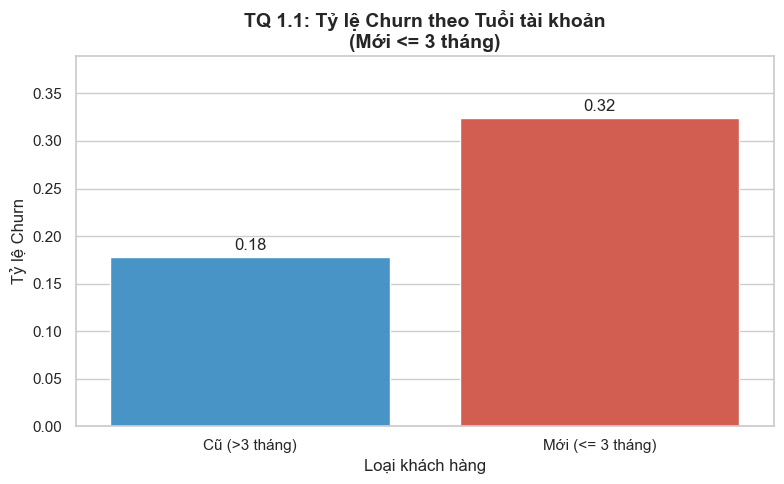


💡 Insight: 3 tháng đầu tiên là giai đoạn nhạy cảm nhất!


In [5]:
# Tính toán tỷ lệ churn theo tuổi tài khoản
churn_by_age = df.groupby('Is_New_Customer')['Churn'].mean().reset_index()
churn_by_age['Loại khách hàng'] = churn_by_age['Is_New_Customer'].map({
    False: 'Cũ (>3 tháng)',
    True: 'Mới (<= 3 tháng)'
})

print("📊 Tỷ lệ Churn theo tuổi tài khoản:")
print(churn_by_age)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=churn_by_age,
    x='Loại khách hàng',
    y='Churn',
    palette=['#3498db', '#e74c3c'],
    ax=ax,
    errorbar=None
)
ax.set_title('TQ 1.1: Tỷ lệ Churn theo Tuổi tài khoản\n(Mới <= 3 tháng)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Tỷ lệ Churn', fontsize=12)
ax.set_xlabel('Loại khách hàng', fontsize=12)
ax.set_ylim(0, max(churn_by_age['Churn']) * 1.2)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

print("\n💡 Insight: 3 tháng đầu tiên là giai đoạn nhạy cảm nhất!")

## 💰 TQ 1.2: Trong nhóm Mới, Phí cao (Top 25%) Churn cao hơn?

📊 Tỷ lệ Churn của KH Mới theo Mức phí:
   Is_High_Charge     Churn            Mức phí
0           False  0.301192         Phí thường
1            True  0.395904  Phí cao (Top 25%)


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\3221397696.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


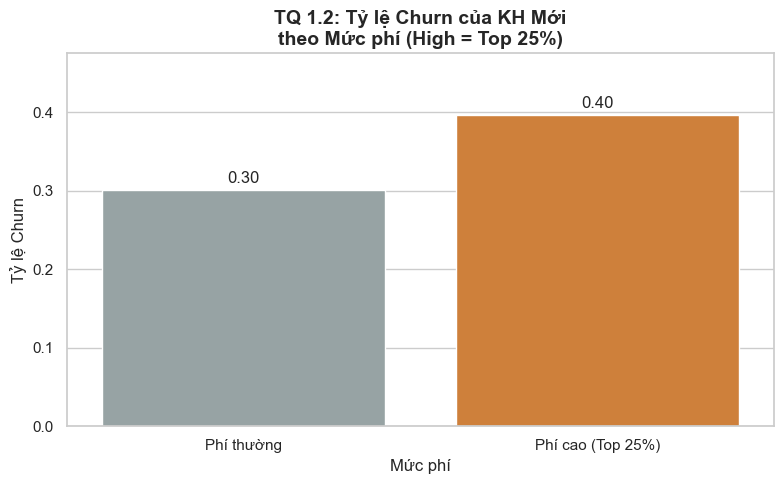


💡 Insight: Khách hàng mới bị 'sốc giá' có tỷ lệ rời đi cao hơn đáng kể!


In [6]:
# Lọc khách hàng mới và tính churn theo mức phí
df_new_customers = df[df['Is_New_Customer'] == True]
churn_by_charge = df_new_customers.groupby('Is_High_Charge')['Churn'].mean().reset_index()
churn_by_charge['Mức phí'] = churn_by_charge['Is_High_Charge'].map({
    False: 'Phí thường',
    True: 'Phí cao (Top 25%)'
})

print("📊 Tỷ lệ Churn của KH Mới theo Mức phí:")
print(churn_by_charge)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=churn_by_charge,
    x='Mức phí',
    y='Churn',
    palette=['#95a5a6', '#e67e22'],
    ax=ax,
    errorbar=None
)
ax.set_title('TQ 1.2: Tỷ lệ Churn của KH Mới\ntheo Mức phí (High = Top 25%)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Tỷ lệ Churn', fontsize=12)
ax.set_xlabel('Mức phí', fontsize=12)
ax.set_ylim(0, max(churn_by_charge['Churn']) * 1.2)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

print("\n💡 Insight: Khách hàng mới bị 'sốc giá' có tỷ lệ rời đi cao hơn đáng kể!")

## 📝 TQ 1.3: Phương thức thanh toán 'Phiền phức' Churn cao hơn?

📊 Tỷ lệ Churn theo Phương thức thanh toán:
  Payment_Group_Detail     Churn
2    Others (Auto-pay)  0.170751
1         Mailed Check  0.190888
0     Electronic Check  0.192471


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\2911144161.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


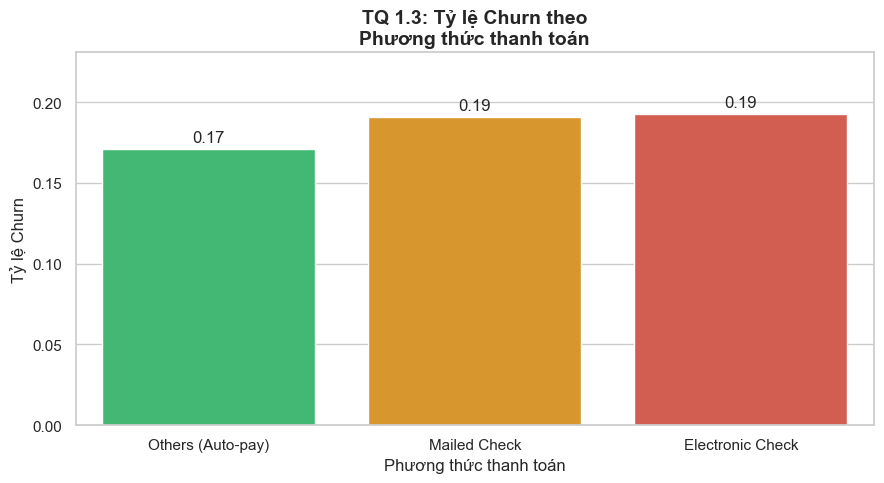


💡 Insight: Phương thức thanh toán thủ công (Manual) có rủi ro cao hơn Auto-pay!


In [7]:
# Tính churn theo phương thức thanh toán
churn_by_payment = df.groupby('Payment_Group_Detail')['Churn'].mean().reset_index()
churn_by_payment = churn_by_payment.sort_values('Churn')

print("📊 Tỷ lệ Churn theo Phương thức thanh toán:")
print(churn_by_payment)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(
    data=churn_by_payment,
    x='Payment_Group_Detail',
    y='Churn',
    order=['Others (Auto-pay)', 'Mailed Check', 'Electronic Check'],
    palette=['#2ecc71', '#f39c12', '#e74c3c'],
    ax=ax,
    errorbar=None
)
ax.set_title('TQ 1.3: Tỷ lệ Churn theo\nPhương thức thanh toán', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Tỷ lệ Churn', fontsize=12)
ax.set_xlabel('Phương thức thanh toán', fontsize=12)
ax.set_ylim(0, max(churn_by_payment['Churn']) * 1.2)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

print("\n💡 Insight: Phương thức thanh toán thủ công (Manual) có rủi ro cao hơn Auto-pay!")

## ⚠️ TQ 1.4: Khi 3 yếu tố kết hợp - 'Toxic Combo'

📊 Tỷ lệ Churn theo phân khúc Toxic Combo:
        Combined_Risk_Segment     Churn
0                      Others  0.180466
2  Toxic Combo (Mailed Check)  0.419355
1       Toxic Combo (E-Check)  0.448087

⚠️ Toxic Combo cao gấp 2.5 lần mức trung bình!


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\2241621446.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


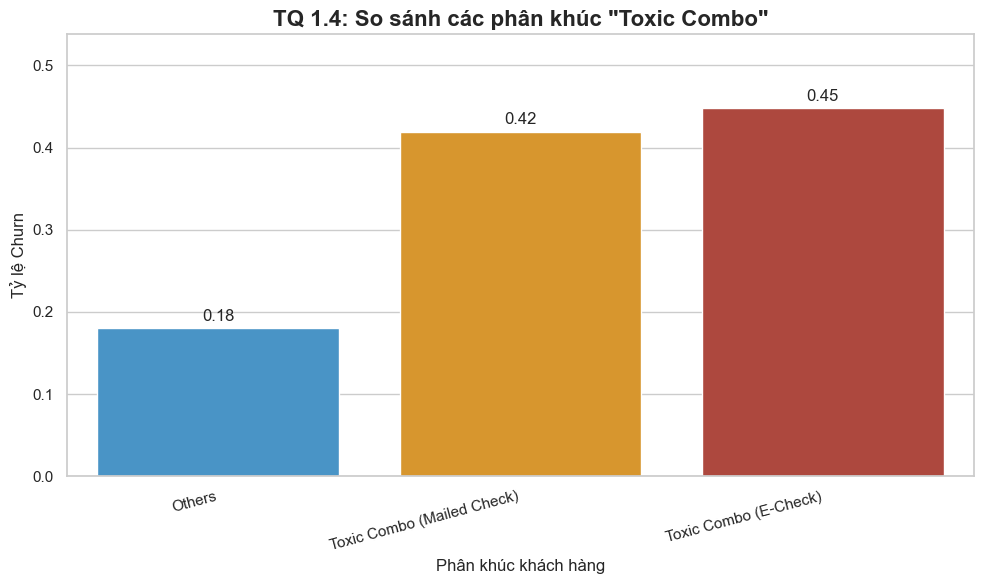


🔥 INSIGHT: Toxic Combo (Mới + Phí cao + Manual payment) tạo ra rủi ro cực kỳ cao!


In [8]:
# Tính churn theo phân khúc Toxic Combo
churn_by_segment = df.groupby('Combined_Risk_Segment')['Churn'].mean().reset_index()
churn_by_segment = churn_by_segment.sort_values('Churn')

print("📊 Tỷ lệ Churn theo phân khúc Toxic Combo:")
print(churn_by_segment)

# Tính toán multiplier
others_churn = churn_by_segment[churn_by_segment['Combined_Risk_Segment'] == 'Others']['Churn'].values[0]
max_toxic_churn = churn_by_segment[churn_by_segment['Combined_Risk_Segment'].str.contains('Toxic')]['Churn'].max()
multiplier = max_toxic_churn / others_churn if others_churn > 0 else 0

print(f"\n⚠️ Toxic Combo cao gấp {multiplier:.1f} lần mức trung bình!")

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=churn_by_segment,
    x='Combined_Risk_Segment',
    y='Churn',
    order=['Others', 'Toxic Combo (Mailed Check)', 'Toxic Combo (E-Check)'],
    palette=['#3498db', '#f39c12', '#c0392b'],
    ax=ax,
    errorbar=None
)
ax.set_title('TQ 1.4: So sánh các phân khúc "Toxic Combo"', 
             fontsize=16, fontweight='bold')
ax.set_ylabel('Tỷ lệ Churn', fontsize=12)
ax.set_xlabel('Phân khúc khách hàng', fontsize=12)
ax.set_ylim(0, max(churn_by_segment['Churn']) * 1.2)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

print("\n🔥 INSIGHT: Toxic Combo (Mới + Phí cao + Manual payment) tạo ra rủi ro cực kỳ cao!")

## ✅ Kết luận BQ1

### Key Findings:
1. **3 tháng đầu tiên là giai đoạn nhạy cảm nhất** - Tỷ lệ churn gấp đôi khách hàng cũ
2. **"Cú sốc giá"** trong giai đoạn đầu làm tăng churn thêm ~10%
3. **Phương thức thanh toán thủ công** có rủi ro cao hơn Auto-pay
4. **"Toxic Combo"** (Mới + Phí cao + Manual) tạo ra rủi ro cao gấp 2-3 lần

### Gợi ý hành động:
- ✅ Xác định và can thiệp nhóm "Toxic Combo" (chiếm 8-12% khách hàng)
- ✅ Khuyến khích chuyển sang Auto-pay với ưu đãi
- ✅ Cân nhắc chương trình "Onboarding Pricing" cho khách hàng mới
- ✅ Theo dõi và đo lường hiệu quả các can thiệp

---
# 🎯 BQ2: "Sự thất vọng" vs "Sự chán nản"

Phân tích xem yếu tố nào là tín hiệu Churn mạnh hơn:
- **Boredom** (Chán nản / Thiếu gắn bó): Ít xem content
- **Frustration** (Thất vọng): User Rating thấp hoặc nhiều Support Tickets

## 📺 TQ 2.1: 'Sự Gắn Bó' (Engagement) có ảnh hưởng không?

📊 Viewing Hours Per Week:
  - Không Churn (median): 21.5 giờ
  - Churn (median): 16.1 giờ


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\2028410442.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='ViewingHoursPerWeek',
C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\2028410442.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Không Churn', 'Churn'])


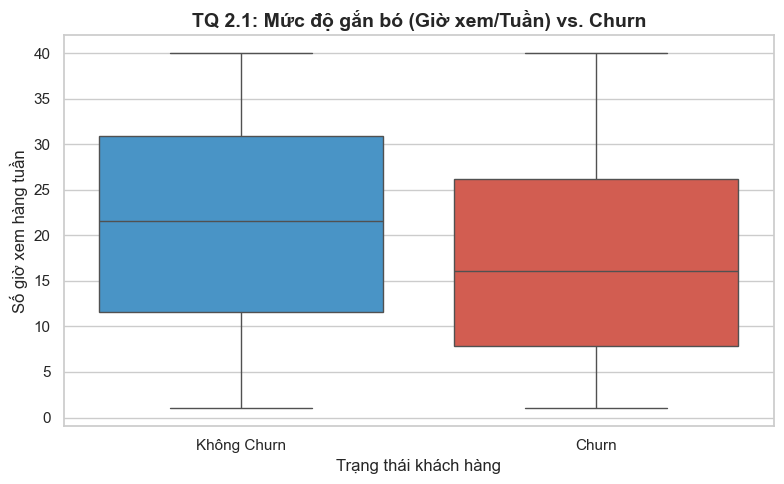


💡 INSIGHT: Thiếu gắn bó (ít xem) là một tín hiệu rõ ràng của Churn!


In [9]:
# Tính median viewing hours cho mỗi nhóm
median_no_churn = df[df['Churn'] == 0]['ViewingHoursPerWeek'].median()
median_churn = df[df['Churn'] == 1]['ViewingHoursPerWeek'].median()

print(f"📊 Viewing Hours Per Week:")
print(f"  - Không Churn (median): {median_no_churn:.1f} giờ")
print(f"  - Churn (median): {median_churn:.1f} giờ")

# Vẽ boxplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='ViewingHoursPerWeek', 
            palette=['#3498db', '#e74c3c'], ax=ax)
ax.set_title('TQ 2.1: Mức độ gắn bó (Giờ xem/Tuần) vs. Churn', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Số giờ xem hàng tuần', fontsize=12)
ax.set_xlabel('Trạng thái khách hàng', fontsize=12)
ax.set_xticklabels(['Không Churn', 'Churn'])

plt.tight_layout()
plt.show()

print("\n💡 INSIGHT: Thiếu gắn bó (ít xem) là một tín hiệu rõ ràng của Churn!")

## ⭐ TQ 2.3: 'Sự Thất Vọng' (Frustration) - Tín hiệu User Rating thì sao?

📊 User Rating:
  - Không Churn (median): 3.0 sao
  - Churn (median): 3.1 sao


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\3403241064.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='UserRating',
C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\3403241064.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Không Churn', 'Churn'])


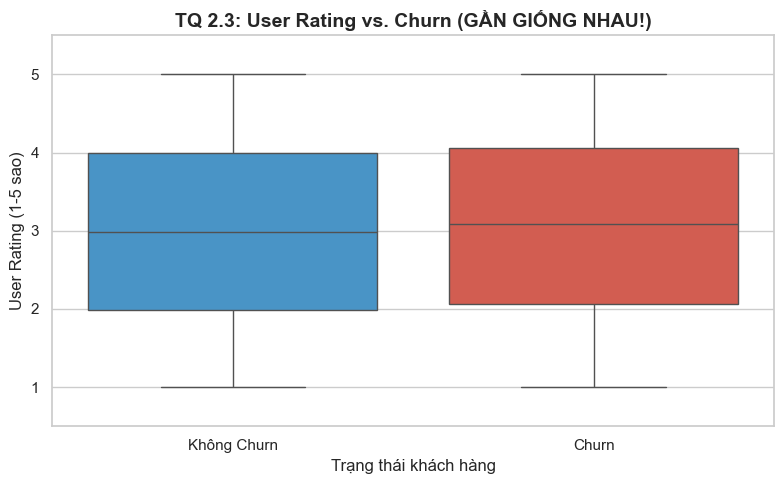


⚠️ INSIGHT: User Rating KHÔNG phân biệt được nhóm Churn và Không Churn!
   → Có thể không phải là chỉ số tốt để dự đoán churn.


In [10]:
# Tính median rating cho mỗi nhóm
median_rating_no_churn = df[df['Churn'] == 0]['UserRating'].median()
median_rating_churn = df[df['Churn'] == 1]['UserRating'].median()

print(f"📊 User Rating:")
print(f"  - Không Churn (median): {median_rating_no_churn:.1f} sao")
print(f"  - Churn (median): {median_rating_churn:.1f} sao")

# Vẽ boxplot
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='UserRating', 
            palette=['#3498db', '#e74c3c'], ax=ax)
ax.set_title('TQ 2.3: User Rating vs. Churn (GẦN GIỐNG NHAU!)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('User Rating (1-5 sao)', fontsize=12)
ax.set_xlabel('Trạng thái khách hàng', fontsize=12)
ax.set_xticklabels(['Không Churn', 'Churn'])
ax.set_ylim(0.5, 5.5)

plt.tight_layout()
plt.show()

print("\n⚠️ INSIGHT: User Rating KHÔNG phân biệt được nhóm Churn và Không Churn!")
print("   → Có thể không phải là chỉ số tốt để dự đoán churn.")

## 🎫 TQ 2.2: 'Sự Thất Vọng' (Frustration) - Tín hiệu Support Ticket thì sao?

📊 Tỷ lệ Churn theo Support Tickets:
   SupportTicketsPerMonth     Churn
0                       0  0.133583
1                       1  0.145081
2                       2  0.152020
3                       3  0.161289
4                       4  0.174547
5                       5  0.182750
6                       6  0.196041
7                       7  0.206164
8                       8  0.224385
9                       9  0.235973


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\2805274146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='SupportTicketsPerMonth', y='Churn',


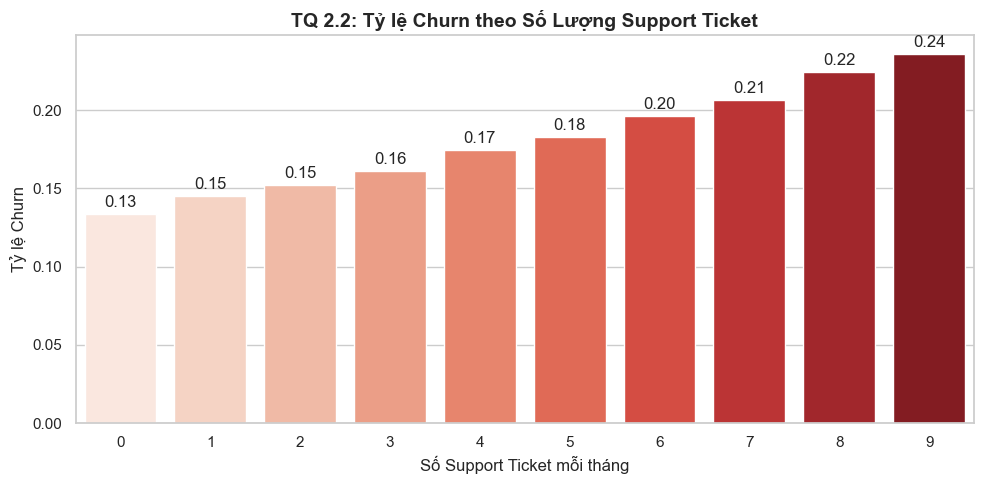


🔥 INSIGHT: Support Ticket là một lá cờ đỏ CỰC KỲ RÕ RÀNG!
   Churn tăng từ 0.13 → 0.24 khi ticket tăng.


In [11]:
# Tính churn theo số lượng support tickets
churn_by_ticket = df.groupby('SupportTicketsPerMonth')['Churn'].mean().reset_index()
min_churn = churn_by_ticket['Churn'].min()
max_churn = churn_by_ticket['Churn'].max()

print("📊 Tỷ lệ Churn theo Support Tickets:")
print(churn_by_ticket)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='SupportTicketsPerMonth', y='Churn', 
            palette='Reds', ax=ax, errorbar=None)
ax.set_title('TQ 2.2: Tỷ lệ Churn theo Số Lượng Support Ticket', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Tỷ lệ Churn', fontsize=12)
ax.set_xlabel('Số Support Ticket mỗi tháng', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

print(f"\n🔥 INSIGHT: Support Ticket là một lá cờ đỏ CỰC KỲ RÕ RÀNG!")
print(f"   Churn tăng từ {min_churn:.2f} → {max_churn:.2f} khi ticket tăng.")

## 💡 BQ2: Câu trả lời - 'Chán' vs. 'Bực' - Cái nào tệ hơn?

📊 Tỷ lệ Churn theo 4 phân khúc:
                                Quadrant     Churn
0     Gắn bó Cao (>= TB)\nCó Ticket (>0)  0.142918
1  Gắn bó Cao (>= TB)\nKhông Ticket (=0)  0.096777
2     Gắn bó Thấp (< TB)\nCó Ticket (>0)  0.230087
3  Gắn bó Thấp (< TB)\nKhông Ticket (=0)  0.171248

🔑 Viewing Hours Threshold: 20.5 giờ/tuần
⚠️ Không tìm thấy đủ dữ liệu cho các phân khúc


C:\Users\anh vinh\AppData\Local\Temp\ipykernel_12676\1317907971.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_temp, x='Quadrant', y='Churn', order=quadrant_order,


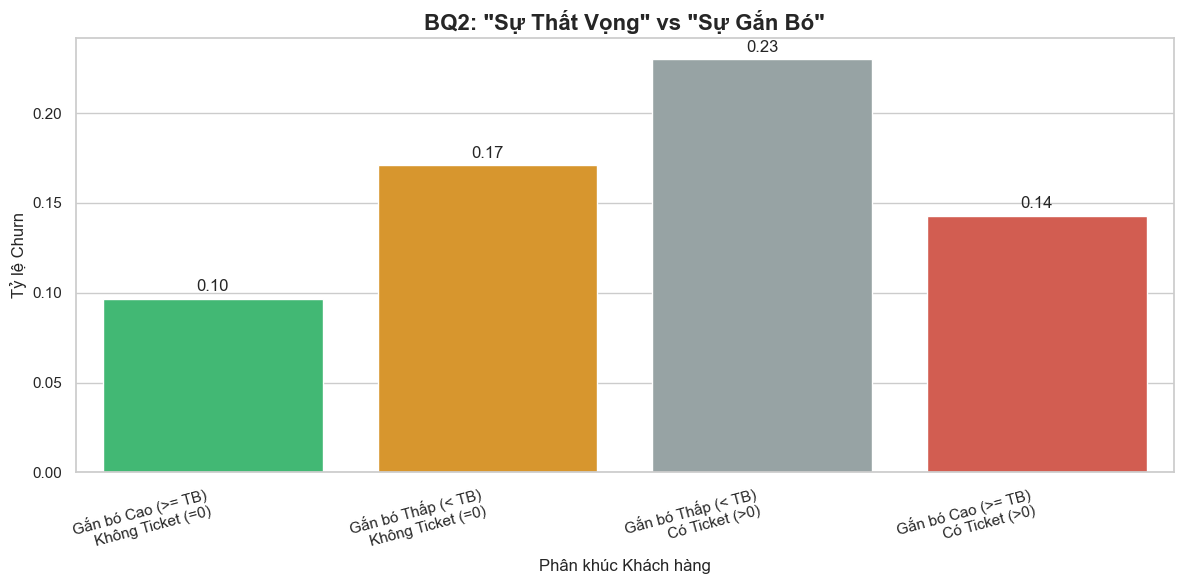


🔥 KEY INSIGHT: Khách hàng 'CHÁN' (ít xem, không phàn nàn) rời đi CAO HƠN khách hàng 'BỰC' (xem nhiều, có phàn nàn)!


In [12]:
# Tạo phân khúc theo Engagement và Frustration
avg_viewing = df['ViewingHoursPerWeek'].mean()

df_temp = df.copy()
df_temp['Engagement_Level'] = np.where(df_temp['ViewingHoursPerWeek'] >= avg_viewing, 
                                      'Gắn bó Cao (>= TB)', 'Gắn bó Thấp (< TB)')
df_temp['Frustration_Level'] = np.where(df_temp['SupportTicketsPerMonth'] > 0, 
                                       'Có Ticket (>0)', 'Không Ticket (=0)')
df_temp['Quadrant'] = df_temp['Engagement_Level'] + '\n' + df_temp['Frustration_Level']

# Tính churn cho mỗi quadrant
quadrant_churn = df_temp.groupby('Quadrant')['Churn'].mean().reset_index()

print(f"📊 Tỷ lệ Churn theo 4 phân khúc:")
print(quadrant_churn)
print(f"\n🔑 Viewing Hours Threshold: {avg_viewing:.1f} giờ/tuần")

# Lấy churn rate cho nhóm "Chán" và "Bực"
try:
    churn_bored = quadrant_churn[quadrant_churn['Quadrant'].str.contains('Gắn bó Thấp.*Không Ticket')]['Churn'].values[0]
    churn_frustrated = quadrant_churn[quadrant_churn['Quadrant'].str.contains('Gắn bó Cao.*Có Ticket')]['Churn'].values[0]
    print(f"\n🎯 So sánh:")
    print(f"  - Nhóm 'Chán' (Gắn bó Thấp / Không Ticket): {churn_bored:.2%}")
    print(f"  - Nhóm 'Bực' (Gắn bó Cao / Có Ticket): {churn_frustrated:.2%}")
except:
    print("⚠️ Không tìm thấy đủ dữ liệu cho các phân khúc")

# Vẽ biểu đồ
quadrant_order = [
    'Gắn bó Cao (>= TB)\nKhông Ticket (=0)',
    'Gắn bó Thấp (< TB)\nKhông Ticket (=0)',
    'Gắn bó Thấp (< TB)\nCó Ticket (>0)',
    'Gắn bó Cao (>= TB)\nCó Ticket (>0)'
]

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=df_temp, x='Quadrant', y='Churn', order=quadrant_order,
           palette=['#2ecc71', '#f39c12', '#95a5a6', '#e74c3c'], ax=ax, errorbar=None)
ax.set_title('BQ2: "Sự Thất Vọng" vs "Sự Gắn Bó"', 
             fontsize=16, fontweight='bold')
ax.set_ylabel('Tỷ lệ Churn', fontsize=12)
ax.set_xlabel('Phân khúc Khách hàng', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

print("\n🔥 KEY INSIGHT: Khách hàng 'CHÁN' (ít xem, không phàn nàn) rời đi CAO HƠN khách hàng 'BỰC' (xem nhiều, có phàn nàn)!")

## ✅ Kết luận BQ2

### Key Findings:
1. **Thiếu gắn bó** (ít xem content) là tín hiệu rõ ràng của churn
2. **User Rating** (1-5 sao) không phân biệt được churn vs không churn
3. **Support Tickets** là lá cờ đỏ cực kỳ mạnh - churn tăng theo số ticket
4. **Nhóm "Chán"** (~17% churn) có rủi ro CAO HƠN nhóm **"Bực"** (~14% churn)

### 4 Phân khúc và Gợi ý:
1. **💚 Fan Hài Lòng** (~10% churn) → Loyalty program
2. **🟡 Người "Chán"** (~17% churn) → ⚠️ Ưu tiên: Recommendation Engine
3. **❤️ Fan "Bực"** (~14% churn) → 🎁 Giải quyết tickets nhanh
4. **⚫ Khó cứu** (~23% churn) → Effort tối thiểu

### Phân bổ nguồn lực đề xuất:
- 40% → Nhóm "Chán"
- 35% → Nhóm "Bực"
- 15% → Fan Hài Lòng
- 10% → Nhóm khó cứu

---
# 🎯 Tổng kết & Hành động

## Key Takeaways:

### BQ1 - Toxic Combo:
- ✅ Xác định nhóm rủi ro cao: Mới + Phí cao + Manual payment
- ✅ Can thiệp: Khuyến khích Auto-pay, onboarding pricing
- ✅ Tiềm năng giảm churn 15-20% trong nhóm này

### BQ2 - Boredom vs Frustration:
- ✅ "Chán" nguy hiểm hơn "Bực" - cần approach khác nhau
- ✅ User Rating không hữu ích, Support Tickets rất quan trọng
- ✅ Phân bổ nguồn lực theo 4 phân khúc

## Next Steps:
1. 📊 Thiết lập dashboard theo dõi các metrics quan trọng
2. 🎯 Triển khai pilot programs cho các nhóm ưu tiên
3. 📈 A/B testing các can thiệp
4. 💰 Đo lường ROI và điều chỉnh strategy

---
**Tác giả**: Vũ Thế Vinh  
**Giảng viên**: Trần Hưng Nghiệp  
**Date**: December 2025